In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **TIME SERIES ANALYSIS FOR REAL ESTATE INVESTMENT**

## **Group 8 Collaborators**
**Students Names:**  
    1. Sammy Sifuna  
    2. Julius Charles  
    3. Waruchu Kuria  
    4. Rael Ndonye  
    5. Alan Omondi  
    6. Janet Khainza

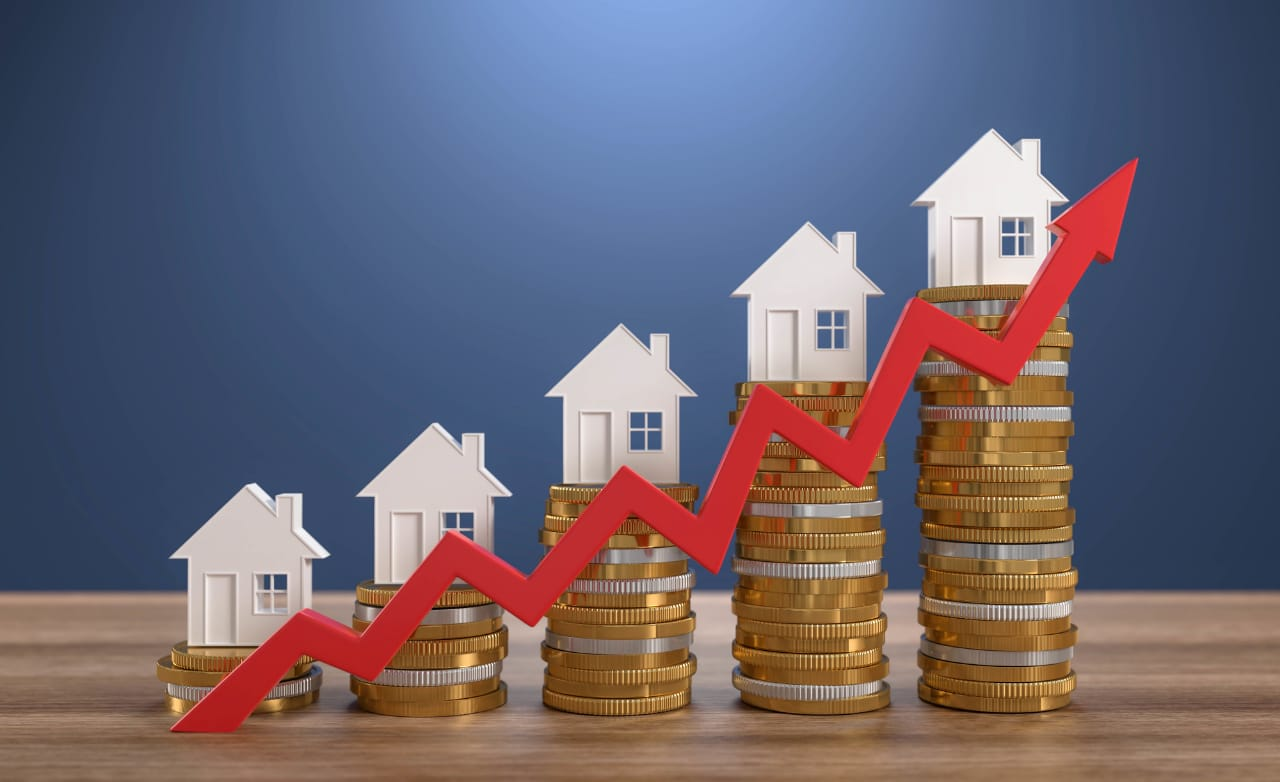

In [2]:
from IPython.display import Image
Image('/content/drive/MyDrive/Group8-Phase4/housing_image.jpg')

## **1.0 Business Understanding**
       
### **1.1 Background**
Between 1996 to 2018, the U.S. real estate market underwent significant transformations. It commenced with an increase in home prices driven by a growing perception of real estate as a valuable long-term investment. However, the Great Recession between 2007 to 2009 brought about extensive declines in home values, triggering foreclosures and eroding trust.
Over time,low interest rates and government interventions helped restore stability and confidence in the market. Urbanization gained momentum as more people gravitated towards cities, younger individuals entered the housing market, and technology assumed a pivotal role. Although certain cities thrived, others faced challenges. Regulatory reforms were introduced to prevent potential crises. In conclusion, this era marked a period of adaptation and evolution in the dynamics of buying and selling homes.

### **1.2 Problem Statement**
Waridi Investments, a recently established real estate investment firm, has engaged our services to identify the top 5 zip codes with the potential for the highest return on investment when they sell in 5 years. Their strategic approach is to initiate short-term investments in one of the most thriving real estate markets in the United States of America. The company places significant emphasis on securing sound investments that ensure consistent cash flow, ultimately enabling them to reinvest effectively when the opportune moment arises.

### **1.3 Objectives**
* To determine the top 5 zip codes that show the highest potential return on investment (ROI) in 5 years .
* To determine the 5 least advisable cities to invest in.
* To identify which top 5 metropolitan areas and states have the highest market performance in terms of price growth.
* To determine the best month to invest to maximize ROI.
* To show how factors like economic stability(recession) impact housing market performance.

#### **Hypotheis testing**
Null Hypothesis (H0): The variables do not help predict future real estate prices

Alternative Hypothesis (H1): The variables predict future real estate prices

## **2.0 Data Understanding**

This data represents median monthly housing sales prices for 265 zip codes in the USA, over the period of April 1996 through April 2018 as reported by Zillow.

Each row represents a unique zip code. Each record contains location information and median housing sales prices for each month.

There are 14723 rows and 272 variables:

* RegionID: Unique index
* RegionName: Unique Zip Code
* City: City in which the zip code is located
* State: State in which the zip code is located
* Metro: Metropolitan Area in which the zip code is located
* CountyName: County in which the zip code is located
* SizeRank: Numerical rank of size of zip code, ranked 1 through 14723
* 1996-04 through 2018-04: refers to the median housing sales values for April 1996 through April 2018, that is 265 data points of monthly data for each zip code

We shall check for the accuracy of our forecasts using MSE (Mean Squared Error). This will provide us with the average error of our forecasts.

#### **Assumptions:**
1. The zip codes are representative of the broader real estate market in the United States.
2. The real estate market conditions during this period were influenced by various economic and socio-political factors.
3. The data covers a combination of urban, suburban, and rural area.
4. The data doesn't reflect significant improvements or renovations made to properties over time that could increase or decrease prices.

In [3]:
# Import libraries
import numpy as np
import folium
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import stats
from random import gauss as gs
import math
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot, lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
%matplotlib inline
plt.style.use('ggplot')

In [4]:
#loading dataset and viewing first 5 rows
data = pd.read_csv('/content/drive/MyDrive/Group8-Phase4/zillow_data.csv')

data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [7]:
# Examine the shape of the dataset
data.shape

(14723, 272)

In [8]:
# Viewing number of zipcodes in dataset and nan values
print('Total number of zipcodes:', len(data))
data.iloc[:, :20].isna().sum()

Total number of zipcodes: 14723


RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
dtype: int64

In [9]:
#Inspecting dataframe dtypes

data.iloc[:, :10].dtypes

RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
dtype: object

In [10]:
# change 'RegionName' column to 'ZipCode' to avoid confusion
data.rename(columns={'RegionName': 'ZipCode'}, inplace=True)

data.ZipCode = data.ZipCode.astype('string')

#confirming the change
print(data.dtypes["ZipCode"])

string


In [11]:
# check for duplicates
data.duplicated().sum()

0

In [12]:
# all missing data because of the datatime appearing as columns
data.isnull().sum()

RegionID       0
ZipCode        0
City           0
State          0
Metro       1043
            ... 
2017-12        0
2018-01        0
2018-02        0
2018-03        0
2018-04        0
Length: 272, dtype: int64

## **Exploratory Data Analysis(EDA) and Feature Engineering**

### **Missing Values**

There are some missing values in the `Metro` and `dates` columns.

In [13]:
# Define a function to explore missing data
def missing_data(data):
    missing_data = data.isna().sum()
    missing_data = missing_data[missing_data>0]
    return missing_data.to_frame()

# Apply missing_data function to the dataframe
missing_data(data)

,0
Metro,1043
1996-04,1039
1996-05,1039
1996-06,1039
1996-07,1039
...,...
2014-02,56
2014-03,56
2014-04,56
2014-05,56


- Missing values in the **Metro** column are replaced with **missing**.  
- Missing values in the dates columns are backfilled.

In [14]:
# replacing the missing values bin Metro with 'missing'
data.Metro.fillna('missing', inplace=True)

# interpolate missing values on date columns
data.interpolate(method="pad", inplace=True)

data.isna().sum().sum()

0

### **Creating New Columns for Analysis**

- In finance, the coefficient of variation allows investors to determine how much volatility, or risk, is assumed in comparison to the amount of return expected from investments.
- Ideally, if the coefficient of variation formula should result in a lower ratio of the standard deviation to mean return, then the better the risk-return trade-off.
- (**CONFIRM**)Therefore, in these next steps we are going to filter the data some more by calculating the CV value and only selecting values with in the company's risk factor (assume 60 percentile).

In [15]:
# # calculating and creating a new column -ROI
# data['ROI'] = (data['2018-04']/ data['1996-04'])-1

# #calculating std to be used to find CV
# data["std"] = data.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)

# #calculating mean to be used to find CV
# data["mean"] = data.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)

# # calculating and creating a new column - CV
# data["CV"] = data['std']/ data["mean"]

# data.columns

In [16]:
# # List of 5-year periods start and end years
# periods = [(1998, 2003), (2003, 2008), (2008, 2013), (2013, 2018)]

# # Create a new DataFrame to store ROI values
# roi_data = pd.DataFrame()

# # Calculate ROI for each period and store in the new DataFrame
# for start_year, end_year in periods:
#     start_col = str(start_year) + '-04'  # Assuming April data is available for each year
#     end_col = str(end_year) + '-04'

#     roi_data['ROI_' + str(start_year) + '-' + str(end_year)] = (
#         (data[end_col] - data[start_col]) / data[start_col]
#     ) * 100

# # Display the new DataFrame with ROI values for each period
# print(roi_data)


## **Select Top 10 States to invest in**
As per this article by [Fit Small Business](https://fitsmallbusiness.com/best-and-worst-states-to-invest-in-real-estate/), the 10 states for the best yields in real estate are Georgia, Utah, Texas, North Carolina and Texas.
- This narrows down our number of Zip Codes to 4039.



In [17]:
# List of states to invest in
states_to_invest = ['GA', 'UT', 'TX', 'NC', 'NJ', 'TN', 'WA', 'DE', 'NE', 'FL']

# Filter data for the selected states
data_states = data[data['State'].isin(states_to_invest)].copy()

# Drop unnecessary columns
columns_to_drop = ['RegionID', 'SizeRank']
data_states.drop(columns_to_drop, axis=1, inplace=True)

# Reset the index
data_states.reset_index(drop=True, inplace=True)

print('Total Zipcodes in DataFrame:', len(data_states))
data_states.head()

Total Zipcodes in DataFrame: 4039


,ZipCode,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,75070,McKinney,TX,Dallas-Fort Worth,Collin,235700.0,236900.0,236700.0,235400.0,233300.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
1,77494,Katy,TX,Houston,Harris,210400.0,212200.0,212200.0,210700.0,208300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
2,79936,El Paso,TX,El Paso,El Paso,77300.0,77300.0,77300.0,77300.0,77400.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
3,77084,Houston,TX,Houston,Harris,95000.0,95200.0,95400.0,95700.0,95900.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
4,77449,Katy,TX,Houston,Harris,95400.0,95600.0,95800.0,96100.0,96400.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200


In [18]:
#Check for zeros
data_states.describe()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,4.039000e+03,4.039000e+03,4.039000e+03,4.039000e+03,4.039000e+03,4.039000e+03,4.039000e+03,4.039000e+03,4.039000e+03,4.039000e+03,...,4.039000e+03,4.039000e+03,4.039000e+03,4.039000e+03,4.039000e+03,4.039000e+03,4.039000e+03,4.039000e+03,4.039000e+03,4.039000e+03
mean,1.130141e+05,1.131389e+05,1.132644e+05,1.133919e+05,1.135325e+05,1.136936e+05,1.138956e+05,1.141223e+05,1.144401e+05,1.148368e+05,...,2.441030e+05,2.455403e+05,2.469844e+05,2.483456e+05,2.496181e+05,2.509984e+05,2.523661e+05,2.539211e+05,2.559388e+05,2.574010e+05
std,7.531940e+04,7.529945e+04,7.529120e+04,7.529444e+04,7.531903e+04,7.536819e+04,7.545085e+04,7.556257e+04,7.572800e+04,7.593374e+04,...,2.143974e+05,2.155871e+05,2.170470e+05,2.183617e+05,2.191411e+05,2.200398e+05,2.213662e+05,2.224815e+05,2.231489e+05,2.232511e+05
min,1.140000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,1.220000e+04,1.230000e+04,1.250000e+04,...,2.730000e+04,2.640000e+04,2.550000e+04,2.510000e+04,2.510000e+04,2.560000e+04,2.580000e+04,2.660000e+04,2.770000e+04,2.830000e+04
25%,6.420000e+04,6.430000e+04,6.455000e+04,6.500000e+04,6.510000e+04,6.530000e+04,6.530000e+04,6.550000e+04,6.580000e+04,6.610000e+04,...,1.296000e+05,1.302000e+05,1.311500e+05,1.317500e+05,1.324500e+05,1.332000e+05,1.337000e+05,1.343500e+05,1.353500e+05,1.363000e+05
50%,9.300000e+04,9.310000e+04,9.310000e+04,9.320000e+04,9.330000e+04,9.350000e+04,9.370000e+04,9.390000e+04,9.410000e+04,9.440000e+04,...,1.894000e+05,1.902000e+05,1.915000e+05,1.927000e+05,1.938000e+05,1.952000e+05,1.955000e+05,1.967000e+05,1.989000e+05,2.007000e+05
75%,1.385000e+05,1.385500e+05,1.388500e+05,1.389000e+05,1.395500e+05,1.397500e+05,1.397000e+05,1.397000e+05,1.402000e+05,1.403000e+05,...,2.933000e+05,2.946000e+05,2.954500e+05,2.978500e+05,2.991500e+05,3.007000e+05,3.021500e+05,3.037000e+05,3.064500e+05,3.089000e+05
max,1.075400e+06,1.075900e+06,1.076500e+06,1.077100e+06,1.077700e+06,1.078400e+06,1.079200e+06,1.080000e+06,1.081200e+06,1.083000e+06,...,4.506300e+06,4.526500e+06,4.560200e+06,4.583200e+06,4.588200e+06,4.609000e+06,4.626500e+06,4.661200e+06,4.692300e+06,4.686200e+06


## **Calculating ROI and CV**

Calculating the average price for the last five years to narrow down the data.

In [19]:
# average price for the last 5 years (2013 to 2018)
data_states['yr_avg']=data_states.iloc[:,-60:].mean(skipna=True, axis=1)

#Calculate the 75% cutoff value
q_75 = data_states['yr_avg'].quantile(q=0.75)
print(f'Average Value 75% cutoff value: {round(q_75,2)}')

#Calculate the 25% cutoff value
q_25 = data_states['yr_avg'].quantile(q=0.25)
print(f'Average Value 25% cutoff value: {round(q_25,2)}')

#Get data frame with selected zipcodes.
states_avg = data_states[(data_states['yr_avg']<q_75) & (data_states['yr_avg']>q_25)]
print(f'Amount of zipcodes: {len(states_avg)}')

Average Value 75% cutoff value: 261322.5
Average Value 25% cutoff value: 115128.33
Amount of zipcodes: 2019


In [20]:
states_avg.head()

,ZipCode,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,yr_avg
2,79936,El Paso,TX,El Paso,El Paso,77300.0,77300.0,77300.0,77300.0,77400.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,115580.000000
3,77084,Houston,TX,Houston,Harris,95000.0,95200.0,95400.0,95700.0,95900.0,...,158700,160200,161900,162800,162800,162800,162900,163500,164300,144023.333333
4,77449,Katy,TX,Houston,Harris,95400.0,95600.0,95800.0,96100.0,96400.0,...,167400,168400,169600,170900,172300,173300,174200,175400,176200,151155.000000
5,32162,The Villages,FL,The Villages,Sumter,101000.0,100700.0,100400.0,100100.0,99800.0,...,250400,249900,248700,247500,247100,246800,247500,249800,251800,240715.000000
6,37013,Nashville,TN,Nashville,Davidson,112400.0,112700.0,113000.0,113400.0,113900.0,...,194900,196600,198800,201300,203800,205900,207600,210000,211900,162231.666667


In [21]:
#Calculate historical return on investment
data_states['ROI'] = (data_states['yr_avg']/data_states['1996-04'])-1

## 5 year ROI
data_states['ROI_5yr'] = round((data_states['2018-04'] - data_states['2013-01'])/ data_states['2013-01'],4)

## 3 year ROI
data_states['ROI_3yr'] = round((data_states['2018-04'] - data_states['2015-01'])/ data_states['2015-01'],4)

#Calculate standard deviation of monthly values
data_states['std'] = data_states.loc[:,'1996-04':'2018-04'].std(skipna=True, axis=1)

#Calculate historical mean value
data_states['mean'] = data_states.loc[:,'1996-04':'2018-04'].mean(skipna=True, axis=1)

#Calculate coefficient of variation
data_states['CV'] = data_states['std']/data_states['mean']

#Show calculated values
data_states[['State', 'ZipCode','std','mean','ROI','ROI_5yr', 'ROI_3yr', 'CV']].head()

,State,ZipCode,std,mean,ROI,ROI_5yr,ROI_3yr,CV
0,TX,75070,33537.101427,219655.849057,0.152121,0.5629,0.2800,0.152680
1,TX,77494,37730.794353,262110.566038,0.461819,0.2842,0.0935,0.143950
2,TX,79936,18167.079218,101875.471698,0.495213,0.0752,0.0593,0.178326
3,TX,77084,17242.109812,121185.283019,0.516035,0.4617,0.1932,0.142279
4,TX,77449,18603.288493,126530.188679,0.584434,0.5021,0.2496,0.147026


In [22]:
states_roi = data_states.groupby('State', group_keys=False).sum()['ROI']
states_roi.sort_values(ascending=False)

State
FL    889.861423
TX    633.181057
NJ    492.465781
GA    447.252845
WA    403.615685
TN    391.399285
NC    387.238301
UT     81.609833
DE     65.466981
NE     60.047105
Name: ROI, dtype: float64

In [23]:
#Define upper limit of CV according to risk profile.
cv_60 = data_states.CV.quantile(.6)
print(f'\nCV upper limit: {cv_60}')


CV upper limit: 0.24694917172427255


In [24]:
# Group states by highest ROIs within the firms risk profile.
states_roi_cv = data_states[data_states['CV'] < cv_60].sort_values('ROI', axis=0, ascending=False)
states_roi_cv.head()

,ZipCode,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2018-02,2018-03,2018-04,yr_avg,ROI,ROI_5yr,ROI_3yr,std,mean,CV
3870,27046,Sandy Ridge,NC,Winston-Salem,Stokes,28400.0,29000.0,29500.0,30200.0,30800.0,...,99000,99300,99200,93935.000000,2.307570,0.1712,0.0508,18170.761602,76712.830189,0.236867
3111,27043,Pinnacle,NC,Winston-Salem,Stokes,42200.0,42700.0,43200.0,43700.0,44200.0,...,142200,142900,144200,132930.000000,2.150000,0.1592,0.1328,25334.991085,113142.641509,0.223921
3916,37325,Delano,TN,Cleveland,Polk,29500.0,30200.0,30900.0,31600.0,32200.0,...,106900,109900,112400,92776.666667,2.144972,0.4907,0.2846,17483.599094,70817.735849,0.246882
2251,68132,Omaha,NE,Omaha,Douglas,67600.0,67600.0,67700.0,67700.0,67800.0,...,223500,227600,231100,195853.333333,1.897239,0.3161,0.2860,35760.525153,154951.320755,0.230786
3732,28435,Currie,NC,Wilmington,Pender,34600.0,35000.0,35300.0,35700.0,36000.0,...,117200,118100,118200,97806.666667,1.826782,0.3586,0.3090,19387.278120,84320.377358,0.229924


In [ ]:
states_roi_cv.shape

(2423, 277)

In [ ]:
# No. of zipcodes per state
states_roi_cv['State'].value_counts()

TX    926
NC    323
TN    307
GA    270
NJ    204
WA    134
UT    110
NE     72
FL     58
DE     19
Name: State, dtype: int64

In [ ]:
### not sure why
states_roi_cv.groupby('State').max()['ROI']

State
DE    0.881305
FL    1.255732
GA    1.615486
NC    2.307570
NE    1.897239
NJ    1.407580
TN    2.144972
TX    1.546914
UT    1.090379
WA    1.611753
Name: ROI, dtype: float64

In [ ]:
states_roi_cv.isna().sum()

ZipCode       0
City          0
State         0
Metro         0
CountyName    0
             ..
ROI_5yr       0
ROI_3yr       0
std           0
mean          0
CV            0
Length: 277, dtype: int64

In [ ]:
states_roi_cv_grouped = states_roi_cv.groupby('State').sum()['ROI']
states_roi_cv_grouped.sort_values(ascending=False)

# max roi, least cv
target_states = list(states_roi_cv_grouped.sort_values(ascending=False).index)
target_states

['TX', 'TN', 'NC', 'GA', 'NJ', 'WA', 'UT', 'NE', 'FL', 'DE']

In [ ]:
# Filter the DataFrame for the target states
states_combined = states_roi_cv[states_roi_cv['State'].isin(target_states)]

# Print the filtered DataFrame
states_combined.head()

,ZipCode,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2018-02,2018-03,2018-04,yr_avg,ROI,ROI_5yr,ROI_3yr,std,mean,CV
3870,27046,Sandy Ridge,NC,Winston-Salem,Stokes,28400.0,29000.0,29500.0,30200.0,30800.0,...,99000,99300,99200,93935.000000,2.307570,0.1712,0.0508,18170.761602,76712.830189,0.236867
3111,27043,Pinnacle,NC,Winston-Salem,Stokes,42200.0,42700.0,43200.0,43700.0,44200.0,...,142200,142900,144200,132930.000000,2.150000,0.1592,0.1328,25334.991085,113142.641509,0.223921
3916,37325,Delano,TN,Cleveland,Polk,29500.0,30200.0,30900.0,31600.0,32200.0,...,106900,109900,112400,92776.666667,2.144972,0.4907,0.2846,17483.599094,70817.735849,0.246882
2251,68132,Omaha,NE,Omaha,Douglas,67600.0,67600.0,67700.0,67700.0,67800.0,...,223500,227600,231100,195853.333333,1.897239,0.3161,0.2860,35760.525153,154951.320755,0.230786
3732,28435,Currie,NC,Wilmington,Pender,34600.0,35000.0,35300.0,35700.0,36000.0,...,117200,118100,118200,97806.666667,1.826782,0.3586,0.3090,19387.278120,84320.377358,0.229924


In [ ]:
states_roi_cv.columns

Index(['ZipCode', 'City', 'State', 'Metro', 'CountyName', '1996-04', '1996-05',
       '1996-06', '1996-07', '1996-08',
       ...
       '2018-02', '2018-03', '2018-04', 'yr_avg', 'ROI', 'ROI_5yr', 'ROI_3yr',
       'std', 'mean', 'CV'],
      dtype='object', length=277)

In [ ]:
# creating a function that changes the dataframe structure from wide view to long view

def melt_df(data):
    melted = pd.melt(data, id_vars=['ZipCode', 'City', 'State', 'Metro',
                                    'CountyName', 'yr_avg', 'ROI', 'ROI_5yr',
                                    'ROI_3yr',	'std',	'mean',	'CV'],
                     var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

states_melted = melt_df(states_combined)

states_melted.head()

,ZipCode,City,State,Metro,CountyName,yr_avg,ROI,ROI_5yr,ROI_3yr,std,mean,CV,Date,value
0,27046,Sandy Ridge,NC,Winston-Salem,Stokes,93935.000000,2.307570,0.1712,0.0508,18170.761602,76712.830189,0.236867,1996-04-01,28400.0
1,27043,Pinnacle,NC,Winston-Salem,Stokes,132930.000000,2.150000,0.1592,0.1328,25334.991085,113142.641509,0.223921,1996-04-01,42200.0
2,37325,Delano,TN,Cleveland,Polk,92776.666667,2.144972,0.4907,0.2846,17483.599094,70817.735849,0.246882,1996-04-01,29500.0
3,68132,Omaha,NE,Omaha,Douglas,195853.333333,1.897239,0.3161,0.2860,35760.525153,154951.320755,0.230786,1996-04-01,67600.0
4,28435,Currie,NC,Wilmington,Pender,97806.666667,1.826782,0.3586,0.3090,19387.278120,84320.377358,0.229924,1996-04-01,34600.0


In [ ]:
# Convert 'date' column to datetime format
states_melted['Date'] = pd.to_datetime(states_melted['Date'])

# Set the 'Date' column as index
states_melted.set_index('Date', inplace=True)

In [ ]:
# Sort the DataFrame by ROI in descending order
top_10_zipcodes = states_melted.sort_values(by='ROI', ascending=False)

# Print the top 10 zip codes by ROI
top_10_zipcodes

,ZipCode,City,State,Metro,CountyName,yr_avg,ROI,ROI_5yr,ROI_3yr,std,mean,CV,value
Date,,,,,,,,,,,,,
1996-04-01,27046,Sandy Ridge,NC,Winston-Salem,Stokes,93935.0,2.307570,0.1712,0.0508,18170.761602,76712.830189,0.236867,28400.0
2008-07-01,27046,Sandy Ridge,NC,Winston-Salem,Stokes,93935.0,2.307570,0.1712,0.0508,18170.761602,76712.830189,0.236867,92800.0
2014-05-01,27046,Sandy Ridge,NC,Winston-Salem,Stokes,93935.0,2.307570,0.1712,0.0508,18170.761602,76712.830189,0.236867,90700.0
2016-01-01,27046,Sandy Ridge,NC,Winston-Salem,Stokes,93935.0,2.307570,0.1712,0.0508,18170.761602,76712.830189,0.236867,92000.0
1998-08-01,27046,Sandy Ridge,NC,Winston-Salem,Stokes,93935.0,2.307570,0.1712,0.0508,18170.761602,76712.830189,0.236867,49500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-07-01,27812,Bethel,NC,Greenville,Pitt,60670.0,-0.321365,-0.3865,0.1446,18823.044964,90468.301887,0.208062,87400.0
2003-02-01,27812,Bethel,NC,Greenville,Pitt,60670.0,-0.321365,-0.3865,0.1446,18823.044964,90468.301887,0.208062,110800.0
2000-05-01,27812,Bethel,NC,Greenville,Pitt,60670.0,-0.321365,-0.3865,0.1446,18823.044964,90468.301887,0.208062,88100.0


### **Converting to Time Series**

**Step 1: Changing the dataframe from wide view to long view**

In [ ]:
melted_data = data_states.copy()

In [ ]:
# creating a function that changes the dataframe structure from wide view to long view

def melt_df(data):
    melted = pd.melt(data, id_vars=['ZipCode', 'City', 'State', 'Metro',
                                    'CountyName'],
                     var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

melted_data = melt_df(melted_data)

**Step 2: Converting the Date Column to DateTime Format and Setting it as the Index**

In [ ]:
# Convert 'date' column to datetime format
melted_data['Date'] = pd.to_datetime(melted_data['Date'])

# Set the 'Date' column as index
melted_data.set_index('Date', inplace=True)

In [ ]:
melted_data.head()

,ZipCode,City,State,Metro,CountyName,value
Date,,,,,,
1996-04-01,75070,McKinney,TX,Dallas-Fort Worth,Collin,235700.0
1996-04-01,77494,Katy,TX,Houston,Harris,210400.0
1996-04-01,79936,El Paso,TX,El Paso,El Paso,77300.0
1996-04-01,77084,Houston,TX,Houston,Harris,95000.0
1996-04-01,77449,Katy,TX,Houston,Harris,95400.0


In [ ]:
print("Columns in melted_data:", melted_data.columns)
print()
print("Columns in states_combined:", states_combined.columns)

Columns in melted_data: Index(['ZipCode', 'City', 'State', 'Metro', 'CountyName', 'value'], dtype='object')

Columns in states_combined: Index(['ZipCode', 'City', 'State', 'Metro', 'CountyName', '1996-04', '1996-05',
       '1996-06', '1996-07', '1996-08',
       ...
       '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', 'yr_avg', 'ROI',
       'std', 'mean', 'CV'],
      dtype='object', length=275)


In [ ]:
# Join the dataframes based on common columns
final_df = melted_data.merge(states_combined, on=['ZipCode', 'City', 'State', 'Metro', 'CountyName'])

# Set the 'Date' column as the index
final_df.set_index('Date', inplace=True)

# Print the resulting DataFrame
final_df.head()

KeyError: ignored

### **Narrowing Down to a Few Zip Codes from the Data**
- The data is quite large.
- Therefore, the analysis will filter out the first 1000 zip codes per state based on median prices (`value`).

In [ ]:
# # Group by 'State' and get the top 1000 zip codes for each state based on median prices
# top_zipcodes = (melted_data.sort_values(['State', 'value'], ascending=[True, False])
#                 .groupby('State')
#                 .head(1000))

# # # Create a new DataFrame with the selected data
# top_zipcodes_df = pd.DataFrame({
#     # 'Date': top_zipcodes['Date'],
#     'State': top_zipcodes['State'],
#     'County': top_zipcodes['CountyName'],
#     'Metro': top_zipcodes['Metro'],
#     'City': top_zipcodes['City'],
#     'ZipCode': top_zipcodes['ZipCode'],
#     'SizeRank': top_zipcodes['SizeRank'],
#     'Value': top_zipcodes['value']

# })
# # # Display the result
# top_zipcodes_df.head()

,State,County,Metro,City,ZipCode,SizeRank,Value
Date,,,,,,,
2016-11-01,AK,Anchorage,Anchorage,Anchorage,99516,6263,498100.0
2016-07-01,AK,Anchorage,Anchorage,Anchorage,99516,6263,497800.0
2016-12-01,AK,Anchorage,Anchorage,Anchorage,99516,6263,497600.0
2016-10-01,AK,Anchorage,Anchorage,Anchorage,99516,6263,497500.0
2018-03-01,AK,Anchorage,Anchorage,Anchorage,99516,6263,497500.0


In [ ]:
top_zipcodes_df.reset_index()

,Date,State,County,Metro,City,ZipCode,SizeRank,Value
0,2016-11-01,AK,Anchorage,Anchorage,Anchorage,99516,6263,498100.0
1,2016-07-01,AK,Anchorage,Anchorage,Anchorage,99516,6263,497800.0
2,2016-12-01,AK,Anchorage,Anchorage,Anchorage,99516,6263,497600.0
3,2016-10-01,AK,Anchorage,Anchorage,Anchorage,99516,6263,497500.0
4,2018-03-01,AK,Anchorage,Anchorage,Anchorage,99516,6263,497500.0
...,...,...,...,...,...,...,...,...
50995,2017-06-01,WY,Converse,missing,Douglas,82633,8163,219000.0
50996,2017-08-01,WY,Albany,Laramie,Laramie,82072,6091,219000.0
50997,2018-02-01,WY,Park,missing,Powell,82435,7667,219000.0
50998,2015-11-01,WY,Albany,Laramie,Laramie,82070,5337,218900.0


In [ ]:
top_zipcodes_df.index.name

'Date'

In [ ]:
# List of 5-year periods start and end years
periods = [(1998, 2003), (2003, 2008), (2008, 2013), (2013, 2018)]

# Create an empty DataFrame to store ROI values
roi_data = pd.DataFrame()

# Iterate over each zip code
for zip_code in top_zipcodes_df['ZipCode']:
    zip_roi_data = {'ZipCode': zip_code}

    for start_year, end_year in periods:
        start_col = str(start_year) + '-04'  # Assuming April data is available for each year
        end_col = str(end_year) + '-04'

        start_value = top_zipcodes_df[top_zipcodes_df['ZipCode'] == zip_code][start_col].values[1]
        end_value = top_zipcodes_df[top_zipcodes_df['ZipCode'] == zip_code][end_col].values[1]

        roi = ((end_value - start_value) / start_value) * 100
        col_name = f'ROI_{start_year}-{end_year}'
        zip_roi_data[col_name] = roi

    # Append the data for the current zip code to the roi_data DataFrame
    roi_data = roi_data.append(zip_roi_data, ignore_index=True)

# Display the new DataFrame with ROI values for each period
print(roi_data)


IndexError: ignored

In [ ]:
# confirming the new columns are added correctly
melted_data.info()

In [ ]:
# ROI 5-years


In [ ]:
# Assuming your datetime column is named 'Date' and it's the index of your melted_data DataFrame
melted_data['Year'] = melted_data.index.year

# Define a function to create 5-year bands
def create_5_year_band(year):
    return f"{year // 5 * 5}-{year // 5 * 5 + 4}"

# Apply the function to the 'Year' column to create the 5-year bands
melted_data['5_Year_Band'] = melted_data['Year'].apply(create_5_year_band)
melted_data.head()


In [ ]:
top_zipcodes_df.index.name

In [ ]:
top_zipcodes_df.info()

- The data now has 51000 records, i.e. 1000 zipcodes from 51 states.

In [ ]:
top_zipcodes_df.columns

In [ ]:
top_zipcodes_df.describe()

### **5-year Return on Investment**

In [ ]:
# # Create a new 'year' column based on the year from the datetime index
# top_zipcodes_df['Year'] = top_zipcodes_df.index.year

# # Define a function to group dates into 5-year periods
# def create_5_year_periods(year):
#     return f"{year}-{year+4}"

# # Apply the function to create the '5-year-periods' column
# top_zipcodes_df['5-year-periods'] = top_zipcodes_df['Year'].apply(create_5_year_periods)

# top_zipcodes_df.tail()

#### **Calculate Mean ROI for each 5-year period**

In [ ]:
mean_roi_by_period = top_zipcodes_df.groupby('5_Year_Band')['ROI'].mean()

# Plotting the data
plt.figure(figsize=(10, 6))
mean_roi_by_period.plot(kind='bar', color='blue')
plt.title('Mean ROI by 5-Year Period')
plt.xlabel('5-Year Period')
plt.ylabel('Mean ROI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Determine the top 5 zip codes that show the highest potential return on investment (ROI)**

In [ ]:
# Create a DataFrame of the top 5 zip codes
top_zipcodes_ROI = pd.DataFrame(top_zipcodes_df.groupby("ZipCode")["ROI"].mean().sort_values(ascending=False).head(5))
print(top_zipcodes_ROI)

# Create a bar chart of the average ROI
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
top_zipcodes_ROI.plot(kind='bar', ax=ax, color="blue")

# Set the title, labels, and ticks
plt.title("Zipcodes with the Highest ROI")
ax.set_ylabel("Average ROI");
ax.set_xlabel("Zipcodes")
# plt.xticks(fontsize= 18)

# Show the bar chart
plt.show()

In [ ]:
#top 5 zipcodes in terms of ROI
top_5_zipcodes_ROI =['10021', '31561', '10011', '11231', '10014']

top5_roi_df = top_zipcodes_df[top_zipcodes_df['ZipCode'].isin(top_5_zipcodes_ROI)]
top5_roi_df.head()

In [ ]:
# Create a DataFrame of the top 5 zip codes
top_zipcodes_CV = pd.DataFrame(top_zipcodes_df.groupby("ZipCode")["CV"].mean().sort_values(ascending=False).head(5))
print(top_zipcodes_CV)

# Create a bar chart of the average CV
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
top_zipcodes_CV.plot(kind='bar', ax=ax, color="red")

# Set the title, labels, and ticks
plt.title("Zipcodes with the Highest CV")
ax.set_ylabel("Average CV");
ax.set_xlabel("Zipcodes")
# plt.xticks(fontsize= 18)

# Show the bar chart
plt.show()

In [ ]:
#top 5 zipcodes in terms of CV
top_5_zipcodes_CV =['56041', '2116', '16102', '43013', '24054']

top5_cv_df = top_zipcodes_df[top_zipcodes_df['ZipCode'].isin(top_5_zipcodes_CV)]
top5_cv_df.head()

### **Determine the 5 Least Advisable Cities to Invest in**

In [ ]:
# Create a DataFrame of the bottom 5 zip codes
bottom_zipcodes_ROI = pd.DataFrame(top_zipcodes_df.groupby("ZipCode")["ROI"].mean().sort_values(ascending=False).tail(5))
print(bottom_zipcodes_ROI)

# Create a bar chart of the average ROI
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
bottom_zipcodes_ROI.plot(kind='bar', ax=ax, color="blue")

# Set the title, labels, and ticks
plt.title("Zipcodes with the Lowest ROI")
ax.set_ylabel("Average ROI");
ax.set_xlabel("Zipcodes")
# plt.xticks(fontsize= 18)

# Show the bar chart
plt.show()

In [ ]:
# bottom 5 zipcodes in terms of ROI
bottom_5_zipcodes_ROI =['67473', '71075', '24054', '28039', '16102']

bottom5_roi_df = top_zipcodes_df[top_zipcodes_df['ZipCode'].isin(bottom_5_zipcodes_ROI)]
bottom5_df.head()

In [ ]:
# Create a DataFrame of the bottom 5 zip codes
bottom_zipcodes_CV = pd.DataFrame(top_zipcodes_df.groupby("ZipCode")["CV"].mean().sort_values(ascending=False).tail(5))
print(bottom_zipcodes_CV)

# Create a bar chart of the average ROI
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
bottom_zipcodes_CV.plot(kind='bar', ax=ax, color="red")

# Set the title, labels, and ticks
plt.title("Zipcodes with the Lowest CV")
ax.set_ylabel("Average ROI");
ax.set_xlabel("Zipcodes")
# plt.xticks(fontsize= 18)

# Show the bar chart
plt.show()

In [ ]:
# bottom 5 zipcodes in terms of CV
bottom_5_zipcodes_CV =['38139', '74137', '46037', '46077', '44040']

bottom5_cv_df = top_zipcodes_df[top_zipcodes_df['ZipCode'].isin(bottom_5_zipcodes_CV)]
bottom5_cv_df.head()

### **Which are the Top 5 Metro Areas and States with the Highest Market Performance in Terms of Price Growth** (correct graph)

In [ ]:
# Group the data by metro area and state and calculate the mean ROI
top_metro_areas_df = top_zipcodes_df.groupby(["Metro", "State"])["ROI"].mean()

# Sort by mean ROI
top_metro_areas_df = top_metro_areas_df.sort_values(ascending=True)

# Get the top 5 metropolitan areas
top_5_metro_areas = top_metro_areas_df.index[:5]

# Print the top 5 metropolitan areas
print("Top 5 Metropolitan Areas with the Highest Market Performance in Terms of Price Growth:")
for metro_area in top_5_metro_areas:
    print(metro_area)

# Plot a horizontal bar graph
plt.figure(figsize=(10, 6))
top_metro_areas_df.loc[top_5_metro_areas].plot(kind='barh', color='blue')
plt.xlabel('Mean ROI')
plt.ylabel('Metro Area, State')
plt.title('Top 5 Metropolitan Areas with the Highest Market Performance')
plt.tight_layout()
plt.show()

In [ ]:
# Group the data by state and calculate the mean ROI
top_cities_df = top_zipcodes_df.groupby(["City", "State"])["ROI"].mean()

# Sort by mean ROI
top_cities_df = top_cities_df.sort_values(ascending=False)

# Get the top 5 states
top_cities_df = top_cities_df.index[:5]

# Print the top 5 states
print("Top 5 Cities with the Highest Market Performance in Terms of Price Growth:")
for city in top_cities_df:
    print(city)

### **Determine the best month to invest to maximize ROI**

In [ ]:
# Group the data by month and calculate the mean ROI
monthly_roi_df = top_zipcodes_df.groupby("Date")["ROI"].mean()

# Sort by mean ROI
monthly_roi_df = monthly_roi_df.sort_values(ascending=False)

# Get the month with the highest mean ROI
best_month = monthly_roi_df.index[0]

# Print the best month
print("The best month to invest to maximize ROI is:", best_month)

In [ ]:
monthly_roi_df.head()

In [ ]:
monthly_data = top_zipcodes_df['Value'].resample('MS').mean()
monthly_data = monthly_data.fillna(monthly_data.bfill())
monthly_data.plot(figsize=(8,5))
plt.title('Average Home Value By Month')
plt.ylabel('Value')
plt.show()
print("Earliest Dates")
print(monthly_data.head())
print()
print("Most Recent")
print(monthly_data.tail())

In [ ]:
monthly_data['2012':].plot(figsize=(8,5))

## **Modeling**
- To begin the modelling, the data will be checked for `trend`, `seasonality` and `residuals`.

### **Checking for Trend** (correct this)

In [ ]:
#checking for trends in the dataset

# Calculate mean ROI for each ZipCode and sort in descending order
top_zipcodes_by_mean_roi = top_zipcodes_df.groupby("ZipCode")["ROI"].mean().sort_values(ascending=False).head(20)

for zip_code, region_data in top_zipcodes_by_mean_roi.groupby("ZipCode"):
  zipcode_data = top_zipcodes_df[top_zipcodes_df["ZipCode"] == zip_code]
  values = zipcode_data['ROI'].mean()  # Select the mean 'ROI'
  plt.plot(values, label=zip_code)  # Plot the values with zip code as label

plt.xlabel('Time')
plt.ylabel('ROI')
plt.title('Line Plot by Zip Code')
plt.legend()
plt.show()

In [ ]:
def seasonal_decomposition(df):
    decomposition = seasonal_decompose(df)

    # Gather the trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot gathered statistics
    plt.figure(figsize=(8,8))
    plt.subplot(411)
    plt.plot(df, label='Original', color='blue')
    #plt.plot(ts, label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()

### **Check for Seasonality**

In [ ]:
seasonal_decompose(top_zipcodes_df["ROI"])

### **Check for Stationarity**

In [ ]:
# Extract the 'ROI' column for analysis
roi_series = top_zipcodes_df['ROI']

# Apply the ADF test
result = adfuller(roi_series)

# Print the ADF test results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])
print("Is Stationary:", "No" if result[1] > 0.05 else "Yes")


- The series `**is stationary**` because the p-value is less than 0.05.
- There will be no need to difference.

In [ ]:
# Checking by State
grouped = top_zipcodes_df.groupby('State')

# For each group (State) apply ADF test
for state, group in grouped:

    # Extract the ROI values for the current state
    roi_values = group['ROI']

    # Performing Augmented Dickey Fuller test
    result = adfuller(roi_values)

    # Print State Name, Test Statistics and p-value
    print(f"State: {state}")
    print(f"Test Statistics: {result[0]}")
    print(f"p-value: {result[1]}")

    # Determine if the data is stationary
    if result[1] < 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")

    print("\n")


ARIMA

In [ ]:
# top_zipcodes_df to csv
csv_file_path = 'top_zipcodes_data.csv'
top_zipcodes_df.to_csv(csv_file_path, index=False)